Generate dataset for segmentation by
- drawing random text and formulas
- generating random positions for the rectangles of each sample drawn in order
  - check whether rectangles intersect by (r1*r2).norm() or (r1*r2).area()

In [1]:
import dataset as ds
import eqndataset as ed

In [4]:
from importlib import reload

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
reload(ed)

<module 'eqndataset' from '/Users/atadenizaydin/Documents/course material/cs491/nino-server/seg/eqndataset.py'>

In [12]:
%%time
hartr = ed.HarvardDataset('/Users/atadenizaydin/Documents/course material/cs491/im2latex/data',
                          'train')

CPU times: user 1.06 s, sys: 178 ms, total: 1.24 s
Wall time: 1.38 s


In [13]:
len(hartr)

75940

In [14]:
len(hartr.samlist)

75940

In [15]:
s = hartr.samlist[100]

In [16]:
s.text

'{ \\frac { d ^ { 2 } \\varphi } { d \\tau ^ { 2 } } } = \\operatorname { s i n } \\varphi \\ ,'

In [17]:
s.path

'/Users/atadenizaydin/Documents/course material/cs491/im2latex/data/images_train/100.png'

In [21]:
a = cv2.imread(s.path, cv2.IMREAD_GRAYSCALE)

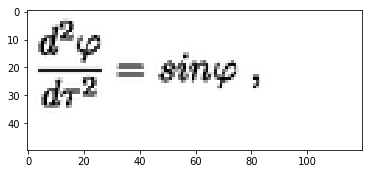

In [22]:
plt.imshow(a, cmap='gray')
plt.show()

In [50]:
ab = cv2.threshold(a, 127, 255, cv2.THRESH_BINARY)[1] # TODO adaptive threshold
ab = cv2.bitwise_not(ab)

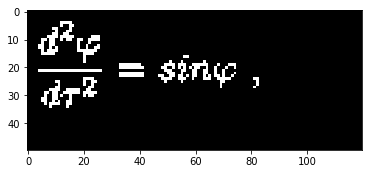

In [51]:
plt.imshow(ab, cmap='gray')
plt.show()

In [38]:
ab2, contours, hierarchy = cv2.findContours(ab, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

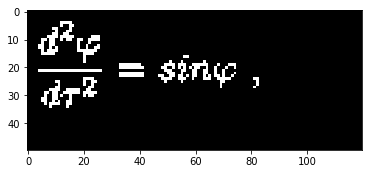

In [39]:
plt.imshow(ab2, cmap='gray')
plt.show()

In [40]:
rects = [cv2.boundingRect(contour) for contour in contours]

In [27]:
import bbox as bb

In [41]:
rects = [bb.Rect(x0,y0,x0+w,y0+h) for (x0,y0,w,h) in rects]

In [44]:
rimg = np.zeros(a2.shape, dtype='int8')
for rect in rects:
    rimg = cv2.rectangle(rimg, (rect.x0, rect.y1), (rect.x1, rect.y0), 255, 1)

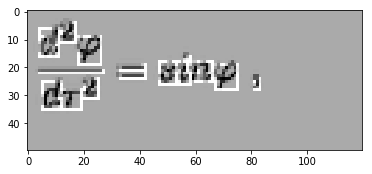

In [52]:
plt.imshow(rimg+a, cmap='gray')
plt.show()

In [53]:
rmax = sum(rects, rects[0])

In [54]:
rimg = cv2.rectangle(np.zeros(a2.shape, dtype='int8'), (rmax.x0, rmax.y1), (rmax.x1, rmax.y0), 255, 1)

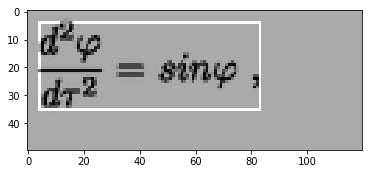

In [55]:
plt.imshow(rimg+a, cmap='gray')
plt.show()

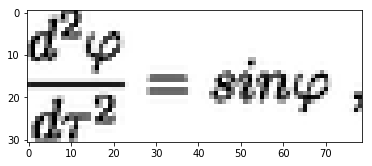

In [58]:
plt.imshow(a[rmax.y0:rmax.y1, rmax.x0:rmax.x1], cmap='gray')
plt.show()

In [59]:
print(cv2.boundingRect.__doc__)

boundingRect(points) -> retval
.   @brief Calculates the up-right bounding rectangle of a point set.
.   
.   The function calculates and returns the minimal up-right bounding rectangle for the specified point set.
.   
.   @param points Input 2D point set, stored in std::vector or Mat.


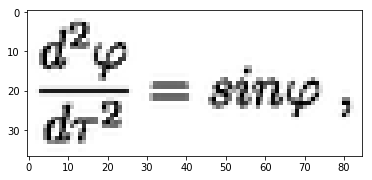

In [60]:
r = 3
plt.imshow(a[rmax.y0-r:rmax.y1+r, rmax.x0-r:rmax.x1+r], cmap='gray')
plt.show()